In [1]:
import os, sys, math
import glob
import cv2
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# %matplotlib notebook

In [2]:
# import plotly.express as px
# Custom modules
sys.path.append('../../NanoscoPy/')
from nanoscopy import spm
from nanoscopy.utilities import dialog_askfilename, dialog_askdirectory 
from nanoscopy import factorial_doe

In [ ]:
import statsmodels.api as sm
from patsy import dmatrices

# Factorial Experiment Data Analysis

In [ ]:
path = dialog_askfilename()

In [ ]:
data = pd.read_excel(path, nrows=19)
data

In [ ]:
factor_A_label = "Voltage (V)"
factor_B_label = 'Setpoint Current (pA)'
factor_C_label = 'Voltage Ramp Rate (V/s)'
factor_D_label = 'Hold Time (s)'
factor_labels = [factor_A_label, factor_B_label, factor_C_label, factor_D_label]

response_1_label = 'Protrusion Length (nm)'
response_2_label = 'Protrusion Width (nm)'
response_3_label = 'Protrusion Height (nm)'
response_labels = [response_1_label, response_2_label, response_3_label]

doe = factorial_doe(data)
doe.select_data(factor_labels)

In [ ]:
doe.plot_response_surfaces(response_1_label)

In [ ]:
doe.plot_effect_grid(response_1_label)

In [ ]:
doe.pareto_plot(response_1_label)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [ ]:
# clean data
data = data.drop(list(range(15,19)))
data

In [ ]:
factor_A_label = "Voltage (V)"
factor_B_label = 'Setpoint Current (pA)'
factor_C_label = 'Voltage Ramp Rate (V/s)'
factor_D_label = 'Hold Time (s)'
factor_labels = [factor_A_label, factor_B_label, factor_C_label, factor_D_label]
factor_letters = ['A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD']

response_1_label = 'Protrusion Length (nm)'
response_2_label = 'Protrusion Width (nm)'
response_3_label = 'Protrusion Height (nm)'
response_labels = [response_1_label, response_2_label, response_3_label]

factor1 = {'name': "Concentration (M)", 'letter': 'A'}

In [ ]:
# Define functions to encode and decode parameter values.
def encode(value,min,max):
    return (value - (min+max)/2) / ((max-min)/2)

def decode(value_coded,min,max):
    return value_coded * (max-min)/2 + (max+min)/2
value = 150
min_val = 150
max_val = 200
value_encoded = encode(value,min_val,max_val)
value_to_decode = 1
value_decoded = decode(value_to_decode,min_val,max_val)
print(f'{value} is encoded to a value of {value_encoded}')
print(f'{value_to_decode} is decoded to a value of {value_decoded}')

In [ ]:
df = pd.read_csv(r'C:\Users\Jesse\OneDrive\Python-Stuff\Research\design_of_experiments\Sample_CCD.csv')

factor1 = {'name':'Concentration (M)','min': 1, 'max': 9}
factor2 = {'name':'Voltage (V)','min': 2, 'max': 8}
factor3 = {'name':'Insertion Depth (mm)','min': 0.2, 'max': 1}
factors = [factor1, factor2, factor3]
factor_names_coded = ['A', 'B', 'C']
response_name = 'Tip Curvature (nm)'

for i, factor in enumerate(factors):
    df[factor_names_coded[i]] = encode(df[factor['name']].values,factor['min'],factor['max'])
df['Y'] = df[response_name]
df

In [ ]:
y, X = dmatrices(' Y ~ A + B + C + np.power(A,2) + np.power(B,2) + np.power(C,2) + A:B + A:C + B:C', data=df, return_type='dataframe')

mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

# Plot fit of response surface

In [ ]:
from scipy.optimize import curve_fit

# test function
def test_function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

def function(data, a, b, c, d, e):
    x = data[0]
    y = data[1]
    return a + b * x + c * y + d*x*y + e

def nonliner_function(data, a, b, c, d, e, f, g, h, k):
    x = data[0]
    y = data[1]
    return a + b * x + c * y + d*x*y + f*(x**2) + h*(y**2) + g*(x*y)**2 + e

def fit_data(fn, X, Y, Z):
    # get fit parameters from scipy curve fit
    parameters, covariance = curve_fit(fn, [X, Y], Z)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(X), max(X), 50)
    model_y_data = np.linspace(min(Y), max(Y), 50)
    # create coordinate arrays for vectorized evaluations
    X_fit, Y_fit = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z_fit = fn(np.array([X_fit, Y_fit]), *parameters)

    return X_fit, Y_fit, Z_fit



cmap = "cool"
cmap = "viridis"
label_pad = 10
axis_font_size = 16
tick_font_size = 14

x_label = factor_A_label
y_label = factor_B_label
z_label = response_1_label
# z_label = 'Apparent Column Width (nm)'
c_label = response_2_label

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, subplot_kw={'projection': '3d'})
plt.suptitle(z_label + " Response Surfaces", fontsize=22)

X = data[x_label]
Y = data[y_label]
Z = data[z_label]
S = np.full((len(X),), 100)
C = data[c_label]
ln_C = np.log(C)

fit = fit_data(function, X, Y, Z)
ax1.plot_surface(*fit, alpha=0.5)
scatter1 = ax1.scatter(X, Y, Z, s=S, c=ln_C, label = C, cmap=cmap, alpha=1.0)
# handles1, labels1 = scatter1.legend_elements(prop="colors")
# legend1 = ax1.legend(handles1, labels1, loc="lower right", title=c_label)
# ax1.set_title("Maximum CNTF Height Response", fontsize=18, pad=20)
ax1.view_init(15, 60)
ax1.tick_params(axis='both', which='major', labelsize=tick_font_size)
ax1.set_xlabel(x_label, fontsize=axis_font_size, labelpad=label_pad)
ax1.set_ylabel(y_label, fontsize=axis_font_size, labelpad=label_pad)
ax1.set_zlabel(z_label, fontsize=axis_font_size)
ax1.invert_xaxis()
fig.colorbar(scatter1, label=response_2_label)

x_label2 = factor_A_label
y_label2 = factor_C_label
X2 = data[x_label2]
Y2 = data[y_label2]
fit2 = fit_data(function, X2, Y2, Z)
ax2.plot_surface(*fit2, alpha=0.5)
scatter2 = ax2.scatter(X2, Y2, Z, s=S,  c=ln_C, label = C, cmap=cmap, alpha=1.0)
# handles2, labels2 = scatter2.legend_elements(prop="colors")
# legend2 = ax2.legend(handles2, labels2, loc="lower right", title=c_label)
# ax2.set_title("Maximum CNTF Height Response", fontsize=18, pad=10)
ax2.view_init(15, 60)
ax2.tick_params(axis='both', which='major', labelsize=tick_font_size)
ax2.set_xlabel(x_label2, fontsize=axis_font_size, labelpad=label_pad)
ax2.set_ylabel(y_label2, fontsize=axis_font_size, labelpad=label_pad)
ax2.set_zlabel(z_label, fontsize=axis_font_size)
ax2.invert_xaxis()

x_label3 = factor_A_label
y_label3 = factor_D_label
X3 = data[x_label3]
Y3 = data[y_label3]
fit3 = fit_data(function, X3, Y3, Z)
ax3.plot_surface(*fit3, alpha=0.5)
scatter3 = ax3.scatter(X3, Y3, Z, s=S,  c=ln_C, label = C, cmap=cmap, alpha=1.0)
# handles2, labels2 = scatter3.legend_elements(prop="colors")
# legend2 = ax3.legend(handles2, labels2, loc="lower right", title=c_label)
# ax3.set_title("Maximum CNTF Height Response", fontsize=18, pad=10)
ax3.view_init(15, 60)
ax3.tick_params(axis='both', which='major', labelsize=tick_font_size)
ax3.set_xlabel(x_label3, fontsize=axis_font_size, labelpad=label_pad)
ax3.set_ylabel(y_label3, fontsize=axis_font_size, labelpad=label_pad)
ax3.set_zlabel(z_label, fontsize=axis_font_size)
ax3.invert_xaxis()

# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
# for i in range(len(X)): #plot each point + it's index as text above
#     ax.text(X[i]+0.5, Y[i]+0.5, Z[i], f'Flow: {C[i]}', size=16, zorder=1, color='k', weight='bold') 

plt.show()

# Compute effects of factors on response 

The main effect of A is calculated by subtracting the average responses at the low-level from the average responses at the high-level. For a $2^2$ design, 

the main effect of factor $A = \frac{1}{2n}[(ab+a)-(b+1)]$,

main effect of factor $B = \frac{1}{2n}[(ab+b)-(a+1)]$.

The interaction effect of factor AB is calculated by subtracting the average  responses when interactions are not present from the average interaction responses at the high-level. So, $AB = \frac{1}{2n}[(ab+1)-(a+b)]$

In [ ]:
highs = data[[factor_A_label, factor_B_label, factor_C_label]].max()
lows = data[[factor_A_label, factor_B_label, factor_C_label]].min()

### Calculate the average high response for factor A

In [ ]:
B_high_mask = data[factor_B_label] == highs[factor_B_label]
B_high_responses = data[B_high_mask][response_1_label] 
B_high_responses_mean = B_high_responses.mean()
B_high_responses_mean

### Calculate the average low response for factor A

In [ ]:
B_low_mask = data[factor_B_label] == lows[factor_B_label]
B_low_responses = data[B_low_mask][response_1_label] 
B_low_responses_mean = B_low_responses.mean()
B_low_responses_mean

In [ ]:
B_high_responses_mean - B_low_responses_mean

## Calculate and plot the components of interaction effects

In [ ]:
highA = data[factor_A_label].max()
lowA = data[factor_A_label].min()

maskHighAHighB = (data['A'] == 1) & (data['B'] == 1)
maskHighALowB = (data['A'] == 1) & (data['B'] == -1)
maskLowAHighB = (data['A'] == -1) & (data['B'] == 1)
maskLowALowB = (data['A'] == -1) & (data['B'] == -1)

y1 = data[maskHighAHighB][response_1_label].mean()
y2 = data[maskHighALowB][response_1_label].mean()
y3 = data[maskLowAHighB][response_1_label].mean()
y4 = data[maskLowALowB][response_1_label].mean()

plt.plot([lowA, highA], [y1,y3], label='+')
plt.plot([lowA, highA], [y2,y4], label='-')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### Generalize the code above for ease of use!

In [ ]:
from scipy.optimize import curve_fit

# test function
def test_function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

def function(data, a, b, c, d, e):
    x = data[0]
    y = data[1]
    return a + b * x + c * y + d*x*y + e

def nonliner_function(data, a, b, c, d, e, f, g, h, k):
    x = data[0]
    y = data[1]
    return a + b * x + c * y + d*x*y + f*(x**2) + h*(y**2) + g*(x*y)**2 + e

def fit_data(fn, X, Y, Z):
    # get fit parameters from scipy curve fit
    parameters, covariance = curve_fit(fn, [X, Y], Z)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(X), max(X), 50)
    model_y_data = np.linspace(min(Y), max(Y), 50)
    # create coordinate arrays for vectorized evaluations
    X_fit, Y_fit = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z_fit = fn(np.array([X_fit, Y_fit]), *parameters)

    return X_fit, Y_fit, Z_fit

In [ ]:
def plot_3F_factorial_surface(data, response_label, factor_A_label, factor_B_label, factor_C_label):
    cmap = "cool"
    cmap = "viridis"
    label_pad = 10
    axis_font_size = 16
    tick_font_size = 14

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, subplot_kw={'projection': '3d'})
    plt.suptitle(response_label + " Response Surfaces", fontsize=22)

    X = data[factor_A_label]
    Y = data[factor_B_label]
    Z = data[response_label]
    S = np.full((len(X),), 100)
    C = data[response_label]
    ln_C = np.log(C)

    fit = fit_data(function, X, Y, Z)
    ax1.plot_surface(*fit, alpha=0.5)
    ax1.scatter(X, Y, Z, s=S, c=ln_C, label = C, cmap=cmap, alpha=1.0)
    # handles1, labels1 = scatter1.legend_elements(prop="colors")
    # legend1 = ax1.legend(handles1, labels1, loc="lower right", title=c_label)
    # ax1.set_title("Maximum CNTF Height Response", fontsize=18, pad=20)
    ax1.view_init(15, 60)
    ax1.tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax1.set_xlabel(factor_A_label, fontsize=axis_font_size, labelpad=label_pad)
    ax1.set_ylabel(factor_B_label, fontsize=axis_font_size, labelpad=label_pad)
    ax1.set_zlabel(response_label, fontsize=axis_font_size)
    ax1.invert_xaxis()

    X2 = data[factor_A_label]
    Y2 = data[factor_C_label]
    fit2 = fit_data(function, X2, Y2, Z)
    ax2.plot_surface(*fit2, alpha=0.5)
    ax2.scatter(X2, Y2, Z, s=S,  c=ln_C, label = C, cmap=cmap, alpha=1.0)
    # handles2, labels2 = scatter2.legend_elements(prop="colors")
    # legend2 = ax2.legend(handles2, labels2, loc="lower right", title=c_label)
    # ax2.set_title("Maximum CNTF Height Response", fontsize=18, pad=10)
    ax2.view_init(15, 60)
    ax2.tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax2.set_xlabel(factor_A_label, fontsize=axis_font_size, labelpad=label_pad)
    ax2.set_ylabel(factor_C_label, fontsize=axis_font_size, labelpad=label_pad)
    ax2.set_zlabel(response_label, fontsize=axis_font_size)
    ax2.invert_xaxis()

    X3 = data[factor_B_label]
    Y3 = data[factor_C_label]
    fit3 = fit_data(function, X3, Y3, Z)
    ax3.plot_surface(*fit3, alpha=0.5)
    ax3.scatter(X3, Y3, Z, s=S,  c=ln_C, label = C, cmap=cmap, alpha=1.0)
    # handles2, labels2 = scatter3.legend_elements(prop="colors")
    # legend2 = ax3.legend(handles2, labels2, loc="lower right", title=c_label)
    # ax3.set_title("Maximum CNTF Height Response", fontsize=18, pad=10)
    ax3.view_init(15, 60)
    ax3.tick_params(axis='both', which='major', labelsize=tick_font_size)
    ax3.set_xlabel(factor_B_label, fontsize=axis_font_size, labelpad=label_pad)
    ax3.set_ylabel(factor_C_label, fontsize=axis_font_size, labelpad=label_pad)
    ax3.set_zlabel(response_label, fontsize=axis_font_size)
    ax3.invert_xaxis()

    # handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    # legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
    # for i in range(len(X)): #plot each point + it's index as text above
    #     ax.text(X[i]+0.5, Y[i]+0.5, Z[i], f'Flow: {C[i]}', size=16, zorder=1, color='k', weight='bold') 

    plt.show()

In [ ]:
def calc_main_effect(data, factor, response):
    high = data[factor].max()
    low = data[factor].min()

    means = {}
    for level in [high, low]:
        factor_level_mask = data[factor] == level
        level_response_mean = data[factor_level_mask][response].mean()
        means[level] = level_response_mean

    return means[high] - means[low]

In [ ]:
def calc_interaction_effect(data, factor1, factor2, response):
    high1 = data[factor1].max()
    low1 = data[factor1].min()
    high2 = data[factor2].max()
    low2 = data[factor2].min()

    means = {}
    for level2 in [high2, low2]:
        factor2_level_mask = data[factor2] == level2
        factor2_level_responses = data[factor2_level_mask][response]

        factor2_level_factor1 = data[factor2_level_mask][factor1]
        conditions = [(factor2_level_factor1 == high1),(factor2_level_factor1 == low1)]
        choices = [1, -1]
        factor_signs = np.select(conditions, choices)
        factor2_responses_factor1_signs = factor2_level_responses * factor_signs
        factor1_factor2_responses_mean = factor2_responses_factor1_signs.mean()
        means[level2] = factor1_factor2_responses_mean

    return means[high2] - means[low2]    

In [ ]:
def calc_3Factor_effects(data, response_label, factor_A_label, factor_B_label, factor_C_label):
    effect_A = calc_main_effect(data, factor_A_label, response_label)
    effect_B = calc_main_effect(data, factor_B_label, response_label)
    effect_C = calc_main_effect(data, factor_C_label, response_label)
    effect_AB = calc_interaction_effect(data, factor_A_label, factor_B_label, response_label)
    effect_AC = calc_interaction_effect(data, factor_A_label, factor_C_label, response_label)
    effect_BC = calc_interaction_effect(data, factor_B_label, factor_C_label, response_label)
    effects = np.array([effect_A, effect_B, effect_C, effect_AB, effect_AC, effect_BC])
    return effects

In [ ]:
def main_effect_plot_3F(data, response_label, factor_A_label, factor_B_label, factor_C_label):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))
    y = data[response_label]
    factors = [factor_A_label, factor_B_label, factor_C_label]
    factor_letters = ['A','B','C']
    axs = [ax1, ax2, ax3]
    for i in range(len(axs)):
        ax = axs[i]
        factor = factors[i]
        x = data[factor]
        ax.scatter(x, y, s=100)
        # ax.set_ylim(ymin=0, ymax=200)
        ax.set_xlabel(factor)
        ax.set_ylabel(response_label)
        ax.set_title(f'Factor {factor_letters[i]}', fontsize=16, fontweight='bold', loc='center')
    
    fig.tight_layout()
    plt.show()

In [ ]:
def plot_response_surfaces(data, response_label, factor_labels):
    cmap = "cool"
    cmap = "viridis"
    label_pad = 10
    axis_font_size = 12
    tick_font_size = 14


    n = len(factor_labels)
    fig_scale = 4
    fig, axs = plt.subplots(n, n, figsize=(fig_scale*n,fig_scale*n), constrained_layout=True, subplot_kw={'projection': '3d'})
    plt.suptitle(response_label + " Response Surfaces", fontsize=22)


    # build a rectangle in axes coords
    left, width = -0.33, 1.66
    bottom, height = -0.2, 1.4
    right = left + width
    top = bottom + height

    Z = data[response_label]
    C = data[response_label]
    ln_C = np.log(C)
    S = np.full((len(Z),), 100)

    for i, row in enumerate(axs):
        for j, ax in enumerate(row):
            factor_A_label = factor_labels[i]
            factor_B_label = factor_labels[j]

            X = data[factor_A_label]
            Y = data[factor_B_label]
            fit = fit_data(function, X, Y, Z)
            ax.plot_surface(*fit, alpha=0.5)
            ax.scatter(X, Y, Z, s=S, c=ln_C, label = C, cmap=cmap, alpha=1.0)
            # handles1, labels1 = scatter1.legend_elements(prop="colors")
            # legend1 = ax.legend(handles1, labels1, loc="lower right", title=c_label)
            # ax.set_title("Maximum CNTF Height Response", fontsize=18, pad=20)
            ax.view_init(15, 60)
            ax.tick_params(axis='both', which='major', labelsize=tick_font_size)
            ax.set_xlabel(factor_A_label, fontsize=axis_font_size, labelpad=label_pad)
            ax.set_ylabel(factor_B_label, fontsize=axis_font_size, labelpad=label_pad)
            ax.set_zlabel(response_label, fontsize=axis_font_size)
            ax.invert_xaxis()

            # handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
            # legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
            # for i in range(len(X)): #plot each point + it's index as text above
            #     ax.text(X[i]+0.5, Y[i]+0.5, Z[i], f'Flow: {C[i]}', size=16, zorder=1, color='k', weight='bold') 

    plt.show()

In [ ]:
import itertools

def calc_effects(data, response_label, factor_labels):
    main_effects = [calc_main_effect(data, factor_label, response_label) for factor_label in factor_labels]
    factor_pairs = itertools.combinations(factor_labels, 2)
    interaction_effects = []

    for factor_label1, factor_label2 in factor_pairs:
            interaction_effect = calc_interaction_effect(data, factor_label1, factor_label2, response_label)
            interaction_effects.append(interaction_effect)        
    
    effects = main_effects + interaction_effects
    return effects

In [ ]:
def plot_main_effects(data, response_label, factor_labels):
    n = len(factor_labels)
    fig, axs = plt.subplots(1, n, figsize=(5*n,5))
    y = data[response_label]
    factor_letters = ['A','B','C']

    for i in range(len(axs)):
        ax = axs[i]
        factor = factor_labels[i]
        x = data[factor]
        ax.scatter(x, y, s=100)
        # ax.set_ylim(ymin=0, ymax=200)
        ax.set_xlabel(factor)
        ax.set_ylabel(response_label)
        ax.set_title(f'Factor {factor}', fontsize=16, fontweight='bold', loc='center')
    
    fig.tight_layout()
    plt.show()

In [ ]:
def interaction_plot(data, response, factor1, factor2):
    high1 = data[factor1].max()
    low1 = data[factor1].min()
    high2 = data[factor2].max()
    low2 = data[factor2].min()

    maskHighAHighB = (data[factor1] == high1) & (data[factor2] == high2)
    maskHighALowB = (data[factor1] == high1) & (data[factor2] == low2)
    maskLowAHighB = (data[factor1] == low1) & (data[factor2] == high2)
    maskLowALowB = (data[factor1] == low1) & (data[factor2] == low2)

    y1 = data[maskLowAHighB][response].mean() 
    y2 = data[maskLowALowB][response].mean()
    y3 = data[maskHighAHighB][response].mean()
    y4 = data[maskHighALowB][response].mean()

    plt.title(f'Interaction between {factor1} and {factor2}')
    plt.plot([low1, high1], [y1,y3], label=f'+ {factor2}')
    plt.plot([low1, high1], [y2,y4], label=f'- {factor2}')
    plt.xlabel(f'{factor1}')
    plt.ylabel(response)

    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

In [ ]:
def plot_interaction_effects(data, response_label, factor_labels):
    n = math.factorial(len(factor_labels))
    fig, axs = plt.subplots(n//2, n//2, figsize=(5*n,5))

    for i, row in enumerate(axs):
        for j, ax in enumerate(axs):
            if i != j:
                factor1 = factor_labels[i]
                factor2 = factor_labels[j]


                high1 = data[factor1].max()
                low1 = data[factor1].min()
                high2 = data[factor2].max()
                low2 = data[factor2].min()

                maskHighAHighB = (data[factor1] == high1) & (data[factor2] == high2)
                maskHighALowB = (data[factor1] == high1) & (data[factor2] == low2)
                maskLowAHighB = (data[factor1] == low1) & (data[factor2] == high2)
                maskLowALowB = (data[factor1] == low1) & (data[factor2] == low2)

                y1 = data[maskLowAHighB][response_label].mean() 
                y2 = data[maskLowALowB][response_label].mean()
                y3 = data[maskHighAHighB][response_label].mean()
                y4 = data[maskHighALowB][response_label].mean()

                ax.plot([low1, high1], [y1,y3], label=f'+ {factor2}')
                ax.plot([low1, high1], [y2,y4], label=f'- {factor2}')
                ax.xlabel(f'{factor1}')
                ax.ylabel(response_label)
                ax.set_title(f'Interaction between {factor1} and {factor2}')

                plt.tight_layout()
                plt.legend(loc='best')

    fig.tight_layout()
    plt.show()

In [ ]:
def linear(x, m, b):
    return m*x + b

fontsize = 16
def plot_effect_grid(data, response_label, factor_labels):
    n = len(factor_labels)
    fig_scale = 4
    fig, axs = plt.subplots(n, n, figsize=(fig_scale*n,fig_scale*n))
    y = data[response_label]
    C = data[response_label]

    # build a rectangle in axes coords
    left, width = -0.33, 1.66
    bottom, height = -0.2, 1.4
    right = left + width
    top = bottom + height

    for i, row in enumerate(axs):
        for j, ax in enumerate(row):
            factor = factor_labels[i]

            if i == j:
                # main effects
                x = data[factor]

                # linear fit
                param, param_cov = curve_fit(linear, x, y)
                # ans stores the new y-data according to
                # the coefficients given by curve-fit() function
                ans = param[0]*x + param[1]
                # print(param[0], param[1])

                # z = np.polyfit(x, y1, 1)
                # p = np.poly1d(z)
                # print(z)

                scatter = ax.scatter(x, y, s=100, c=C)
                ax.plot(x, ans, linestyle='dashed', color ='black', label='linear fit')
                # ax.text(1.0, 0.2, f'Intercept = {param[0]:.2}, Slope = {param[1]:.2}', fontsize = 11)

                # ax.set_ylim(ymin=0, ymax=200)
                ax.set_xlabel(factor)
                ax.set_ylabel(response_label)
                ax.set_title(f'{factor}')
                ax.legend(loc='best')
                # fig.colorbar(scatter, label=response_2_label)

                if i == 0:
                    ax.text(0.5*(left+right), top, factor,
                            horizontalalignment='center',
                            verticalalignment='center',
                            transform=ax.transAxes,
                            fontsize=fontsize, 
                            fontweight='bold')
                    ax.text(left, 0.5*(bottom+top), factor,
                            horizontalalignment='center',
                            verticalalignment='center',
                            rotation=90,
                            transform=ax.transAxes,
                            fontsize=fontsize, 
                            fontweight='bold')

            else:
                # interaction effects
                factor1 = factor
                factor2 = factor_labels[j]

                high1 = data[factor1].max()
                low1 = data[factor1].min()
                high2 = data[factor2].max()
                low2 = data[factor2].min()

                maskHighAHighB = (data[factor1] == high1) & (data[factor2] == high2)
                maskHighALowB = (data[factor1] == high1) & (data[factor2] == low2)
                maskLowAHighB = (data[factor1] == low1) & (data[factor2] == high2)
                maskLowALowB = (data[factor1] == low1) & (data[factor2] == low2)

                y1 = data[maskLowAHighB][response_label].mean() 
                y2 = data[maskLowALowB][response_label].mean()
                y3 = data[maskHighAHighB][response_label].mean()
                y4 = data[maskHighALowB][response_label].mean()

                ax.plot([low1, high1], [y1,y3], label=f'+ {factor2}')
                ax.plot([low1, high1], [y2,y4], label=f'- {factor2}')
                ax.set_xlabel(f'{factor1}')
                ax.set_ylabel(response_label)
                ax.set_title(f'{factor1}:{factor2}')
                ax.legend(loc='best')

                if i == 0:
                    ax.text(0.5*(left+right), top, factor2,
                            horizontalalignment='center',
                            verticalalignment='center',
                            transform=ax.transAxes,
                            fontsize=fontsize, 
                            fontweight='bold')
                if j == 0:
                    ax.text(left, 0.5*(bottom+top), factor,
                            horizontalalignment='center',
                            verticalalignment='center',
                            rotation=90,
                            transform=ax.transAxes,
                            fontsize=fontsize, 
                            fontweight='bold')

    fig.tight_layout()
    plt.show()

In [ ]:
from matplotlib.ticker import PercentFormatter

def Pareto_plot(effects, factor_labels, xlabel, ylabel):
    colors = []
    signs = []
    for effect in effects:
        if effect < 0:
            colors.append('gray')
            signs.append(-1)
        else:
            colors.append('royalblue')
            signs.append(1)

    effects_df = pd.DataFrame({
                    'factors': factor_labels,
                    'effects': np.abs(effects),
                    'signs': signs,
                    'colors': colors
                })

    effects_df_sorted = effects_df.sort_values('effects', ascending=False)
    x = effects_df_sorted['factors'].values
    y = effects_df_sorted['effects'].values
    c = effects_df_sorted['colors'].values
    s = effects_df_sorted['signs'].values
    weights = y / y.sum()
    cumsum = weights.cumsum()    

    fig, ax1 = plt.subplots()
    legend_labels = ['Positive Sign','Negative Sign']
    handles = [plt.Rectangle((0,0), 1,1, color='royalblue'), plt.Rectangle((0,0), 1,1, color='gray')]
    plt.legend(handles, legend_labels, loc='center right')

    ax1.bar(x, y, color = c)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')

    vals = ax2.get_yticks()
    ax2.yaxis.set_major_formatter(PercentFormatter())

    # hide y-labels on right side
    show_pct_y = False
    if not show_pct_y:
        ax2.set_yticks([])

    pct_format='{0:.0%}'
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    

    title = f'Pareto plot of Main and Interaction Effects on Response'
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

## Lets use these to investigate the factorial data 

In [ ]:
plot_response_surfaces(data, response_3_label, factor_labels)

In [ ]:
plot_effect_grid(data, response_3_label, factor_labels)

In [ ]:
effects = calc_effects(data, response_3_label, factor_labels)
xlabel = 'Factors'
ylabel = f'Magnitude of Effect on {response_3_label}'
# factor_letters = ['A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BA', 'BC', 'BD', 'CA', 'CB', 'CD', 'DA', 'DB', 'DC']
# factor_letters = ['A', 'B', 'C', 'AB', 'AC', 'BC']
factor_letters = ['A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD']
print(len(effects), len(factor_letters))
Pareto_plot(effects, factor_letters, xlabel, ylabel)

## Interperating these plots is another matter not covered here!

# Generating STM Probe Master config files from the design table  

The probe master VI config files contain a series of steps seperated by new lines, as seen below:

```json
[Step 0]
Operation = "Wait"
To = "0.000000E+0"
Or = "FALSE"
T Param = "1.000000E+0"
Until = "0"
Cutoff Param = "3.000000E-10"
Feedback ON? = "TRUE"

[Step 1]
Operation = "Wait"
To = "0.000000E+0"
Or = "FALSE"
T Param = "2.000000E+0"
Until = "0"
Cutoff Param = "3.000000E-10"
Feedback ON? = "FALSE"

[Step 2]
Operation = "Change Z height (m)"
To = "5.000000E-11"
Or = "FALSE"
T Param = "0.000000E+0"
Until = "0"
Cutoff Param = "0.000000E+0"
Feedback ON? = "FALSE"
```

In [31]:
path = dialog_askfilename()

In [32]:
data = pd.read_excel(path, nrows=19)
data

Randomized Order  X1  X2  X3  X4  Voltage (V)  Tip Dive (pm)  \
0                  1   0   0   0   0          7.0           -650   
1                  6  -1  -1  -1  -1          5.5           -925   
2                 14   1  -1  -1  -1          8.5           -375   
3                 15  -1   1  -1  -1          5.5           -925   
4                  5   1   1  -1  -1          8.5           -375   
5                 11  -1  -1   1  -1          5.5           -925   
6                  3   1  -1   1  -1          8.5           -375   
7                  8  -1   1   1  -1          5.5           -925   
8                  2   1   1   1  -1          8.5           -375   
9                  9   0   0   0   0          7.0           -650   
10                10  -1  -1  -1   1          5.5           -925   
11                 7   1  -1  -1   1          8.5           -375   
12                13  -1   1  -1   1          5.5           -925   
13                18   1   1  -1   1          8.5           -375   
14                16  -1  -1   1   1          5.5           -925   
15                17   1  -1   1   1          8.5           -375   
16                 4  -1   1   1   1          5.5           -925   
17                12   1   1   1   1          8.5           -375   
18                19   0   0   0   0          7.0           -650   

    Voltage Ramp Rate (V/s)  Hold Time (s)  Unnamed: 9  ...  Comments  \
0                  1.580000         10.050         NaN  ...       NaN   
1                  0.499640          5.075         NaN  ...       NaN   
2                  0.499640          5.075         NaN  ...       NaN   
3                  0.499640          5.075         NaN  ...       NaN   
4                  0.499640          5.075         NaN  ...       NaN   
5                  4.996399          5.075         NaN  ...       NaN   
6                  4.996399          5.075         NaN  ...       NaN   
7                  4.996399          5.075         NaN  ...       NaN   
8                  4.996399          5.075         NaN  ...       NaN   
9                  1.580000         10.050         NaN  ...       NaN   
10                 0.499640         15.025         NaN  ...       NaN   
11                 0.499640         15.025         NaN  ...       NaN   
12                 0.499640         15.025         NaN  ...       NaN   
13                 0.499640         15.025         NaN  ...       NaN   
14                 4.996399         15.025         NaN  ...       NaN   
15                 4.996399         15.025         NaN  ...       NaN   
16                 4.996399         15.025         NaN  ...       NaN   
17                 4.996399         15.025         NaN  ...       NaN   
18                 1.580000         10.050         NaN  ...       NaN   

    Starting Bias (V)      Unnamed: 16  Voltage (V).1  Tip Dive (pm).1  \
0                 3.0              Min            4.0          -1200.0   
1                 NaN              Max           10.0           -100.0   
2                 NaN              NaN            NaN              NaN   
3                 NaN              Add            7.0           -650.0   
4                 NaN         Multiply            3.0            550.0   
5                 NaN              NaN            NaN              NaN   
6                 NaN      Num Factors            4.0              NaN   
7                 NaN  Num Experiments           16.0              NaN   
8                 NaN            Alpha            2.0              NaN   
9                 NaN              NaN            NaN              NaN   
10                NaN              NaN            NaN              NaN   
11                NaN              NaN            NaN              NaN   
12                NaN              NaN            NaN              NaN   
13                NaN              NaN            NaN              NaN   
14                NaN              NaN            NaN              NaN  

In [33]:
data_sorted = data.sort_values('Randomized Order')
data_sorted

Randomized Order  X1  X2  X3  X4  Voltage (V)  Tip Dive (pm)  \
0                  1   0   0   0   0          7.0           -650   
8                  2   1   1   1  -1          8.5           -375   
6                  3   1  -1   1  -1          8.5           -375   
16                 4  -1   1   1   1          5.5           -925   
4                  5   1   1  -1  -1          8.5           -375   
1                  6  -1  -1  -1  -1          5.5           -925   
11                 7   1  -1  -1   1          8.5           -375   
7                  8  -1   1   1  -1          5.5           -925   
9                  9   0   0   0   0          7.0           -650   
10                10  -1  -1  -1   1          5.5           -925   
5                 11  -1  -1   1  -1          5.5           -925   
17                12   1   1   1   1          8.5           -375   
12                13  -1   1  -1   1          5.5           -925   
2                 14   1  -1  -1  -1          8.5           -375   
3                 15  -1   1  -1  -1          5.5           -925   
14                16  -1  -1   1   1          5.5           -925   
15                17   1  -1   1   1          8.5           -375   
13                18   1   1  -1   1          8.5           -375   
18                19   0   0   0   0          7.0           -650   

    Voltage Ramp Rate (V/s)  Hold Time (s)  Unnamed: 9  ...  Comments  \
0                  1.580000         10.050         NaN  ...       NaN   
8                  4.996399          5.075         NaN  ...       NaN   
6                  4.996399          5.075         NaN  ...       NaN   
16                 4.996399         15.025         NaN  ...       NaN   
4                  0.499640          5.075         NaN  ...       NaN   
1                  0.499640          5.075         NaN  ...       NaN   
11                 0.499640         15.025         NaN  ...       NaN   
7                  4.996399          5.075         NaN  ...       NaN   
9                  1.580000         10.050         NaN  ...       NaN   
10                 0.499640         15.025         NaN  ...       NaN   
5                  4.996399          5.075         NaN  ...       NaN   
17                 4.996399         15.025         NaN  ...       NaN   
12                 0.499640         15.025         NaN  ...       NaN   
2                  0.499640          5.075         NaN  ...       NaN   
3                  0.499640          5.075         NaN  ...       NaN   
14                 4.996399         15.025         NaN  ...       NaN   
15                 4.996399         15.025         NaN  ...       NaN   
13                 0.499640         15.025         NaN  ...       NaN   
18                 1.580000         10.050         NaN  ...       NaN   

    Starting Bias (V)      Unnamed: 16  Voltage (V).1  Tip Dive (pm).1  \
0                 3.0              Min            4.0          -1200.0   
8                 NaN            Alpha            2.0              NaN   
6                 NaN      Num Factors            4.0              NaN   
16                NaN              NaN            NaN              NaN   
4                 NaN         Multiply            3.0            550.0   
1                 NaN              Max           10.0           -100.0   
11                NaN              NaN            NaN              NaN   
7                 NaN  Num Experiments           16.0              NaN   
9                 NaN              NaN            NaN              NaN   
10                NaN              NaN            NaN              NaN   
5                 NaN              NaN            NaN              NaN   
17                NaN              NaN            NaN              NaN   
12                NaN              NaN            NaN              NaN   
2                 NaN              NaN            NaN              NaN   
3                 NaN              Add            7.0           -650.0  

In [19]:
def gen_config_step(index, operation, to_val, or_val, time, until, cutoff, feedback):
    return f'[Step {index}]\nOperation = "{operation}"\nTo = "{to_val}"\nOr = "{or_val}"\nT Param = "{time}"\nUntil = "{until}"\nCutoff Param = "{cutoff}"\nFeedback ON? = "{feedback}"\n'

In [20]:
def gen_config_string(row, return_bias = -3):
    step_template = {
        'index': 0,
        'operation': "Wait",
        "to_val": "0",
        "or_val": "FALSE",
        "time": "1",
        "until": "0",
        "cutoff": "0",
        "feedback": "TRUE"
    }

    config_steps = []
    bias, setpoint = row['Voltage (V)'], row['Setpoint Current (pA)']
    ramp_rate, hold_time =  row['Voltage Ramp Rate (V/s)'], row['Hold Time (s)']

    # stabilize at new setpoint w/ feedback on
    step1 = step_template.copy()
    step1['cutoff'] = f"{setpoint* 10**-12}"
    config_steps.append(gen_config_step(**step1))

    # ramp bias back to new value w/ feedback OFF
    step2 = step_template.copy()
    step2['index'] = 1
    step2['operation'] = 'Set Bias (V)'
    step2['to_val'] = f"{bias}"
    step2['or_val'] = 'TRUE'
    step2['time'] = f"{ramp_rate}"
    step2['cutoff'] = f"{setpoint* 10**-12}"
    step2['feedback'] = "FALSE"
    config_steps.append(gen_config_step(**step2))

    # hold at bias setpoint for hold time w/ feedback OFF
    step3 = step_template.copy()
    step3['index'] = 2
    step3['time'] = f"{hold_time}"
    step3['cutoff'] = f"{setpoint * 10**-12}"
    step3['feedback'] = "FALSE"
    config_steps.append(gen_config_step(**step3))

    # ramp bias back to previous value w/ feedback OFF
    step4 = step_template.copy()
    step4['index'] = 3
    step4['operation'] = "Set Bias (V)"
    step4['to_val'] = f"{return_bias}"
    step4['or_val'] = "TRUE"
    step4['time'] = f"{ramp_rate}"
    step4['cutoff'] = f"{setpoint* 10**-12}"  
    step4['feedback'] = "FALSE"   
    config_steps.append(gen_config_step(**step4)) 

    # turn feedback ON and stabilize for 1 second
    step5 = step_template.copy()
    step5['index'] = 4
    step5['cutoff'] = "0.0"
    step5['feedback'] = "TRUE"
    step5['cutoff'] = f"{setpoint* 10**-12}"
    config_steps.append(gen_config_step(**step5))

    # append final config parameters
    other_params = '[Other Parameters]\nCutoff Metric = 0\nController OFF Gain = 0\nSwitch Gain = FALSE\nExperiment = "Poke"\nUser Comments = ""'
    config_steps.append(other_params)

    return '\n'.join(config_steps)

In [36]:
def gen_config_string_dive(row, return_bias = 2.5):
    step_template = {
        'index': 0,
        'operation': "Wait",
        "to_val": "0",
        "or_val": "FALSE",
        "time": "1",
        "until": "0",
        "cutoff": "0",
        "feedback": "TRUE"
    }

    config_steps = []
    setpoint = 200
    bias, dive = row['Voltage (V)'], row['Tip Dive (pm)']
    ramp_rate, hold_time =  row['Voltage Ramp Rate (V/s)'], row['Hold Time (s)']

    # ramp bias to zero volts
    step0 = step_template.copy()
    step0['operation'] = 'Set Bias (V)'
    step0['index'] = 0
    step0['to_val'] = 0
    step0['time'] = 1
    step0['feedback'] = "FALSE"
    step0['cutoff'] = f"{setpoint* 10**-12}"
    config_steps.append(gen_config_step(**step0))

    # dive the tip w feedback off
    step1 = step_template.copy()
    step1['operation'] = 'Change Z height (m)'
    step1['index'] = 1
    step1['to_val'] = f"{dive * 10**-12}"
    step1['feedback'] = "FALSE"
    step1['cutoff'] = f"{setpoint* 10**-12}"
    config_steps.append(gen_config_step(**step1))

    # ramp bias back to new value w/ feedback OFF
    step2 = step_template.copy()
    step2['index'] = 2
    step2['operation'] = 'Set Bias (V)'
    step2['to_val'] = f"{bias}"
    step2['or_val'] = 'TRUE'
    step2['time'] = f"{ramp_rate}"
    step2['cutoff'] = f"{setpoint* 10**-12}"
    step2['feedback'] = "FALSE"
    config_steps.append(gen_config_step(**step2))

    # hold at bias setpoint for hold time w/ feedback OFF
    step3 = step_template.copy()
    step3['index'] = 3
    step3['time'] = f"{hold_time}"
    step3['cutoff'] = f"{setpoint * 10**-12}"
    step3['feedback'] = "FALSE"
    config_steps.append(gen_config_step(**step3))

    # ramp bias back to previous value w/ feedback OFF
    step4 = step_template.copy()
    step4['index'] = 4
    step4['operation'] = "Set Bias (V)"
    step4['to_val'] = f"{return_bias}"
    step4['or_val'] = "TRUE"
    step4['time'] = f"{ramp_rate}"
    step4['cutoff'] = f"{setpoint* 10**-12}"  
    step4['feedback'] = "FALSE"   
    config_steps.append(gen_config_step(**step4)) 

    # retract tip 50 nm with feedback off
    step5 = step_template.copy()
    step5['index'] = 5
    step5['operation'] = 'Change Z height (m)'
    step5['to_val'] = f"{50 * 10**-9}"
    step5['feedback'] = "FALSE"
    step5['cutoff'] = f"{setpoint* 10**-12}"
    config_steps.append(gen_config_step(**step5))

    # turn feedback ON and stabilize for 1 second
    step6 = step_template.copy()
    step6['index'] = 6
    step6['feedback'] = "TRUE"
    step6['cutoff'] = f"{setpoint* 10**-12}"
    config_steps.append(gen_config_step(**step6))

    # append final config parameters
    other_params = '[Other Parameters]\nCutoff Metric = 0\nController OFF Gain = 0\nSwitch Gain = FALSE\nExperiment = "Poke"\nUser Comments = ""'
    config_steps.append(other_params)

    return '\n'.join(config_steps)

In [22]:
def gen_config_file(data):
    data_sorted = data.sort_values('Randomized Order')

    for i, row in data_sorted.iterrows():
        index = row['Randomized Order']
        config_string = gen_config_string_dive(row)
        # print(config_string, end = '')

        out_path = os.path.join(r"E:\University of Central Florida\UCFTeam-Physics-Ishigami-Research - General\Code\Python\Factorial Config Files", f"Factorial_Experiment_{str(index).zfill(3)}.ini")
        with open(out_path, 'w') as file:
            file.write(config_string)

In [37]:
gen_config_file(data)

## Analyse and plots factorial experiment data

In [ ]:
factor_A_label = "Voltage (V)"
factor_B_label = 'Setpoint Current (pA)'
factor_C_label = 'Voltage Ramp Rate (V/s)'
factor_D_label = 'Hold Time (s)'
factor_labels = [factor_A_label, factor_B_label, factor_C_label, factor_D_label]

response_1_label = 'Protrusion Length (nm)'
response_2_label = 'Protrusion Width (nm)'
response_3_label = 'Protrusion Height (nm)'
response_labels = [response_1_label, response_2_label, response_3_label]

doe = factorial_doe(data)
doe.select_data(factor_labels)

## Genreate experiment image grid from AutoPoke Logs

In [67]:
log_path = dialog_askfilename()

In [68]:
logs = pd.read_csv(log_path, header=3, sep='\t')
logs.head()

Grid Point  Experiment Number Experiment Stage  \
0           0                  0           Before   
1           0                  0          After-1   
2           1                  1           Before   
3           1                  1          After-1   
4           2                  2           Before   

                                      Image Filename  
0  Automated-Factorial-Experiment_2022-07-13_Seri...  
1  Automated-Factorial-Experiment_2022-07-13_Seri...  
2  Automated-Factorial-Experiment_2022-07-13_Seri...  
3  Automated-Factorial-Experiment_2022-07-13_Seri...  
4  Automated-Factorial-Experiment_2022-07-13_Seri...

In [69]:
filenames = logs['Image Filename']
filenames.head()

0    Automated-Factorial-Experiment_2022-07-13_Seri...
1    Automated-Factorial-Experiment_2022-07-13_Seri...
2    Automated-Factorial-Experiment_2022-07-13_Seri...
3    Automated-Factorial-Experiment_2022-07-13_Seri...
4    Automated-Factorial-Experiment_2022-07-13_Seri...
Name: Image Filename, dtype: object

In [70]:
data_dir = dialog_askdirectory()
data_dir

'E:/University of Central Florida/UCFTeam-Physics-Ishigami-Research - General/Experimental Data/STM Data/2022/2022-07-13'

In [71]:
full_filepaths = data_dir + '/' + filenames.astype(str)
full_filepaths.head()

0    E:/University of Central Florida/UCFTeam-Physi...
1    E:/University of Central Florida/UCFTeam-Physi...
2    E:/University of Central Florida/UCFTeam-Physi...
3    E:/University of Central Florida/UCFTeam-Physi...
4    E:/University of Central Florida/UCFTeam-Physi...
Name: Image Filename, dtype: object

In [72]:
scans = [spm.read(filepath)[0] for filepath in full_filepaths]

In [73]:
corrected_scans = [spm.correct(scan.dataframe['image'], terrace=True)[0] for scan in scans]

 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done ########## [100.00%]
 Corrcting images...Done #########

In [9]:
terraced_scans = [spm.process.terrace_level(scan.dataframe['image'][0]) for scan in scans]

In [12]:
befores = corrected_scans[::2]
afters = corrected_scans[1::2]
n = len(afters)

In [58]:
n

19

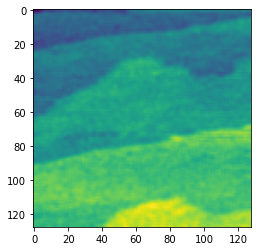

In [13]:
plt.imshow(befores[0])

In [ ]:
fig_scale = 2
fig, axs = plt.subplots(n, 2, figsize=(7,65), constrained_layout=True)

for i, row in enumerate(axs):
    ax1, ax2 = row
    before, after = befores[i], afters[i]
    ax1.set_title("Before", fontsize=18, pad=20)
    ax1.imshow(before)
    ax1.axis('off')

    ax2.set_title("After", fontsize=18, pad=20)
    ax2.imshow(after)
    ax2.axis('off')

plt.show()

KeyboardInterrupt: 

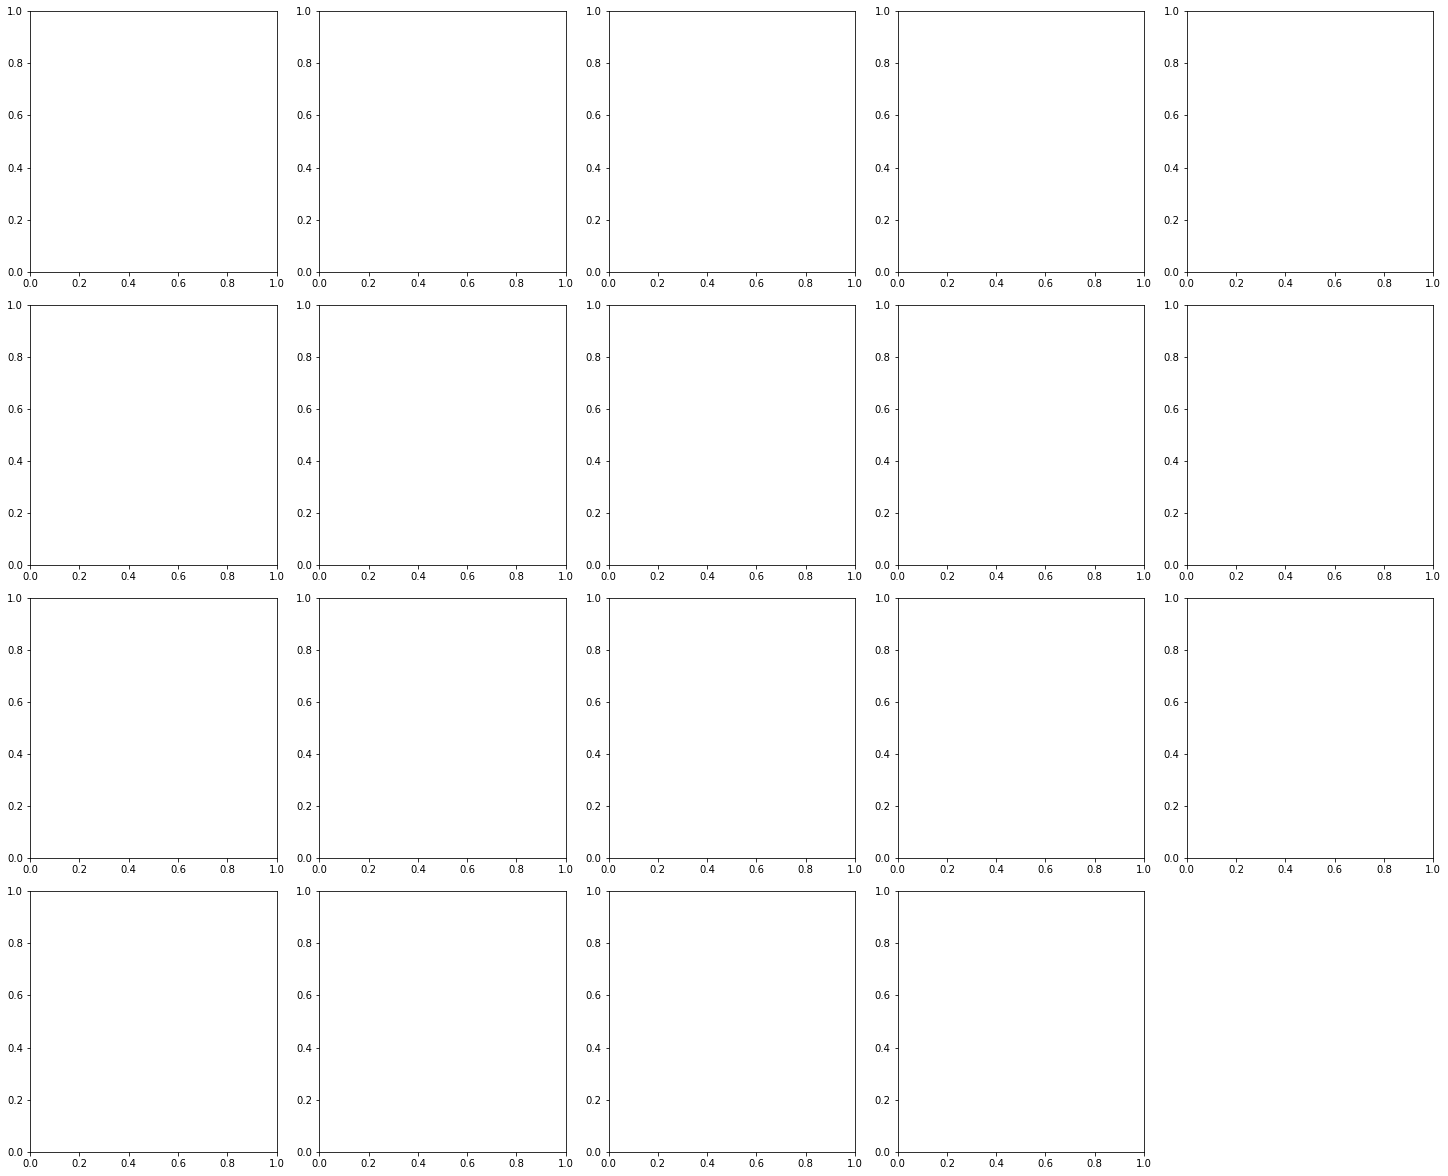

In [60]:
fig_scale = 4
m = math.ceil((math.sqrt(n)))
fig, axs = plt.subplots(m, m, figsize=(fig_scale*m, fig_scale*m), constrained_layout=True)

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        k=i*m+j
        after =  afters[k]
        ax.set_title(f"After {k}", fontsize=18, pad=20)
        ax.imshow(after, cmap='afmhot')
        ax.axis('off')

plt.show()

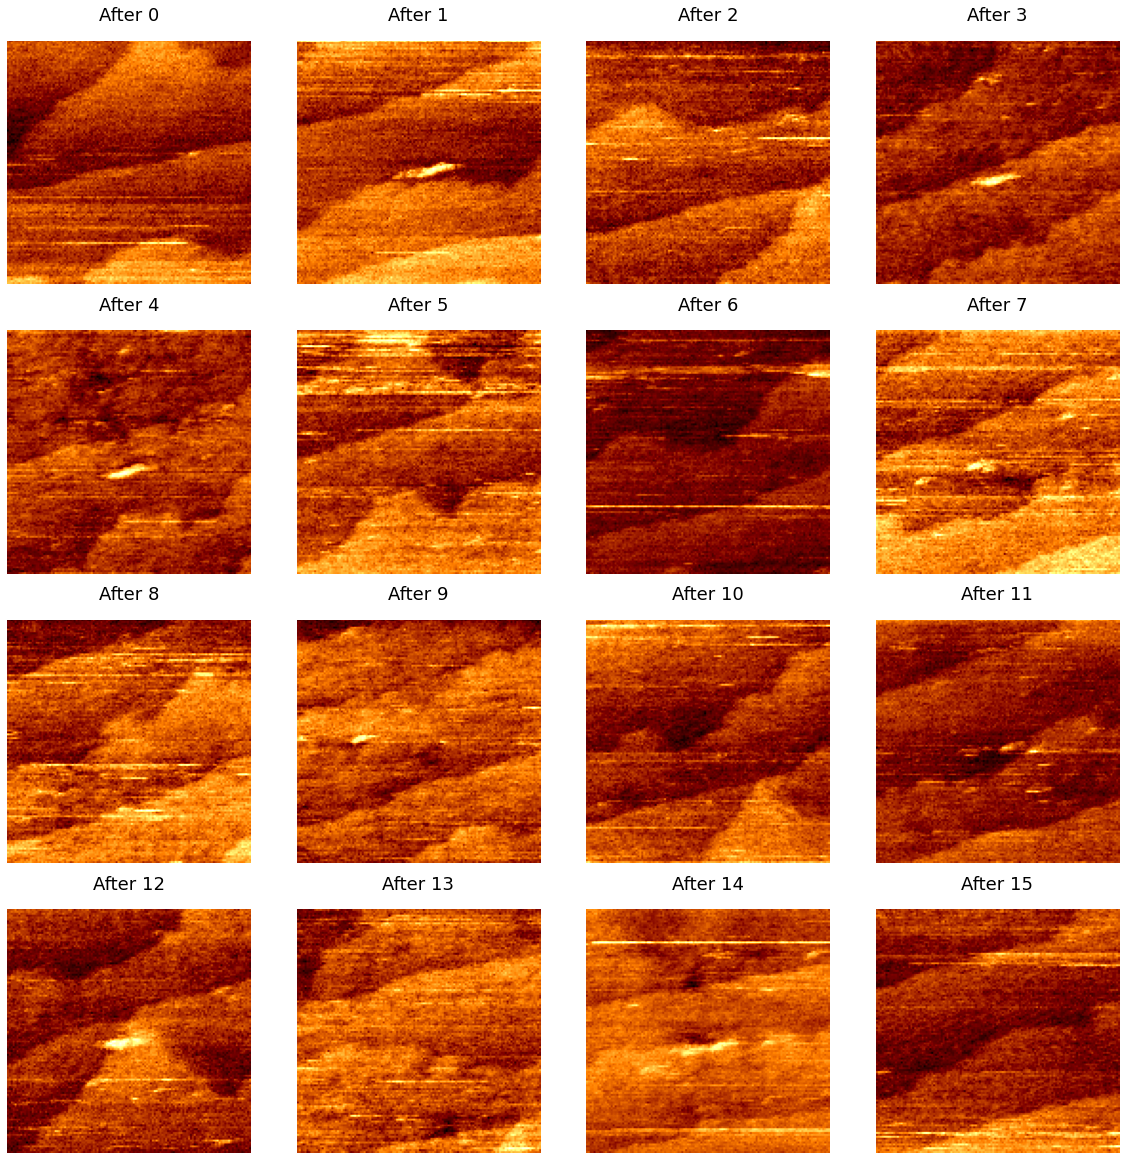

In [10]:
befores = terraced_scans[::2]
afters = terraced_scans[1::2]
n = len(afters)

fig_scale = 4
m = int(math.sqrt(n))
fig, axs = plt.subplots(m, m, figsize=(fig_scale*m, fig_scale*m), constrained_layout=True)

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        k=i*m+j
        after =  afters[k]
        ax.set_title(f"After {k}", fontsize=18, pad=20)
        ax.imshow(after, cmap='afmhot')
        ax.axis('off')

plt.show()

In [74]:
def image_grid(images, label):
    fig_scale = 4
    n = len(images)
    m = math.ceil((math.sqrt(n)))
    _, axs = plt.subplots(m, m, figsize=(fig_scale*m, fig_scale*m), constrained_layout=True)

    for i, row in enumerate(axs):
        for j, ax in enumerate(row):
            k=i*m+j
            if k >= n:
                ax.axis('off')
            else:
                image =  images[k]
                ax.set_title(f"{label} {k}", fontsize=26, pad=20)
                ax.imshow(image, cmap='inferno')
                ax.axis('off')

    path = os.path.join(r'C:\Users\lab_cos_ishigami\Downloads',f'{label}s gird.png')
    plt.savefig(path, bbox_inches='tight')
    plt.show()

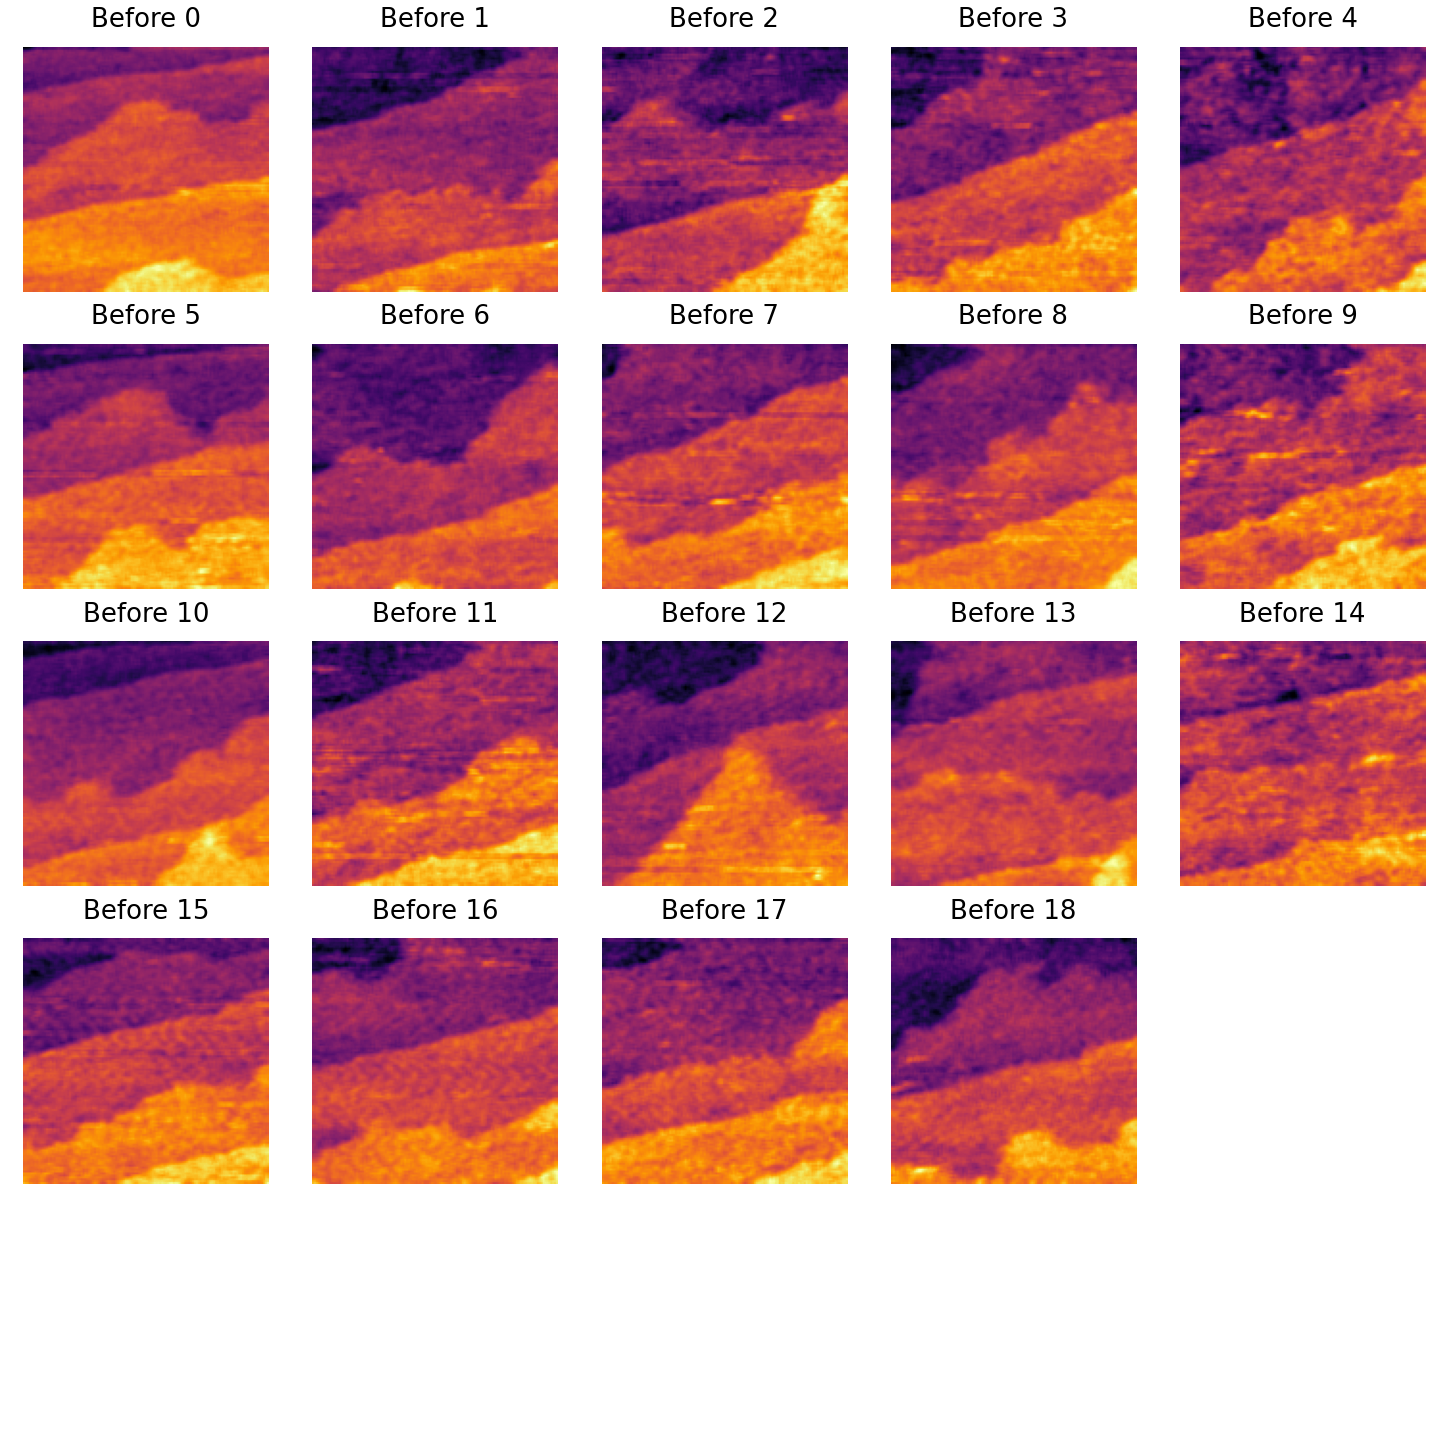

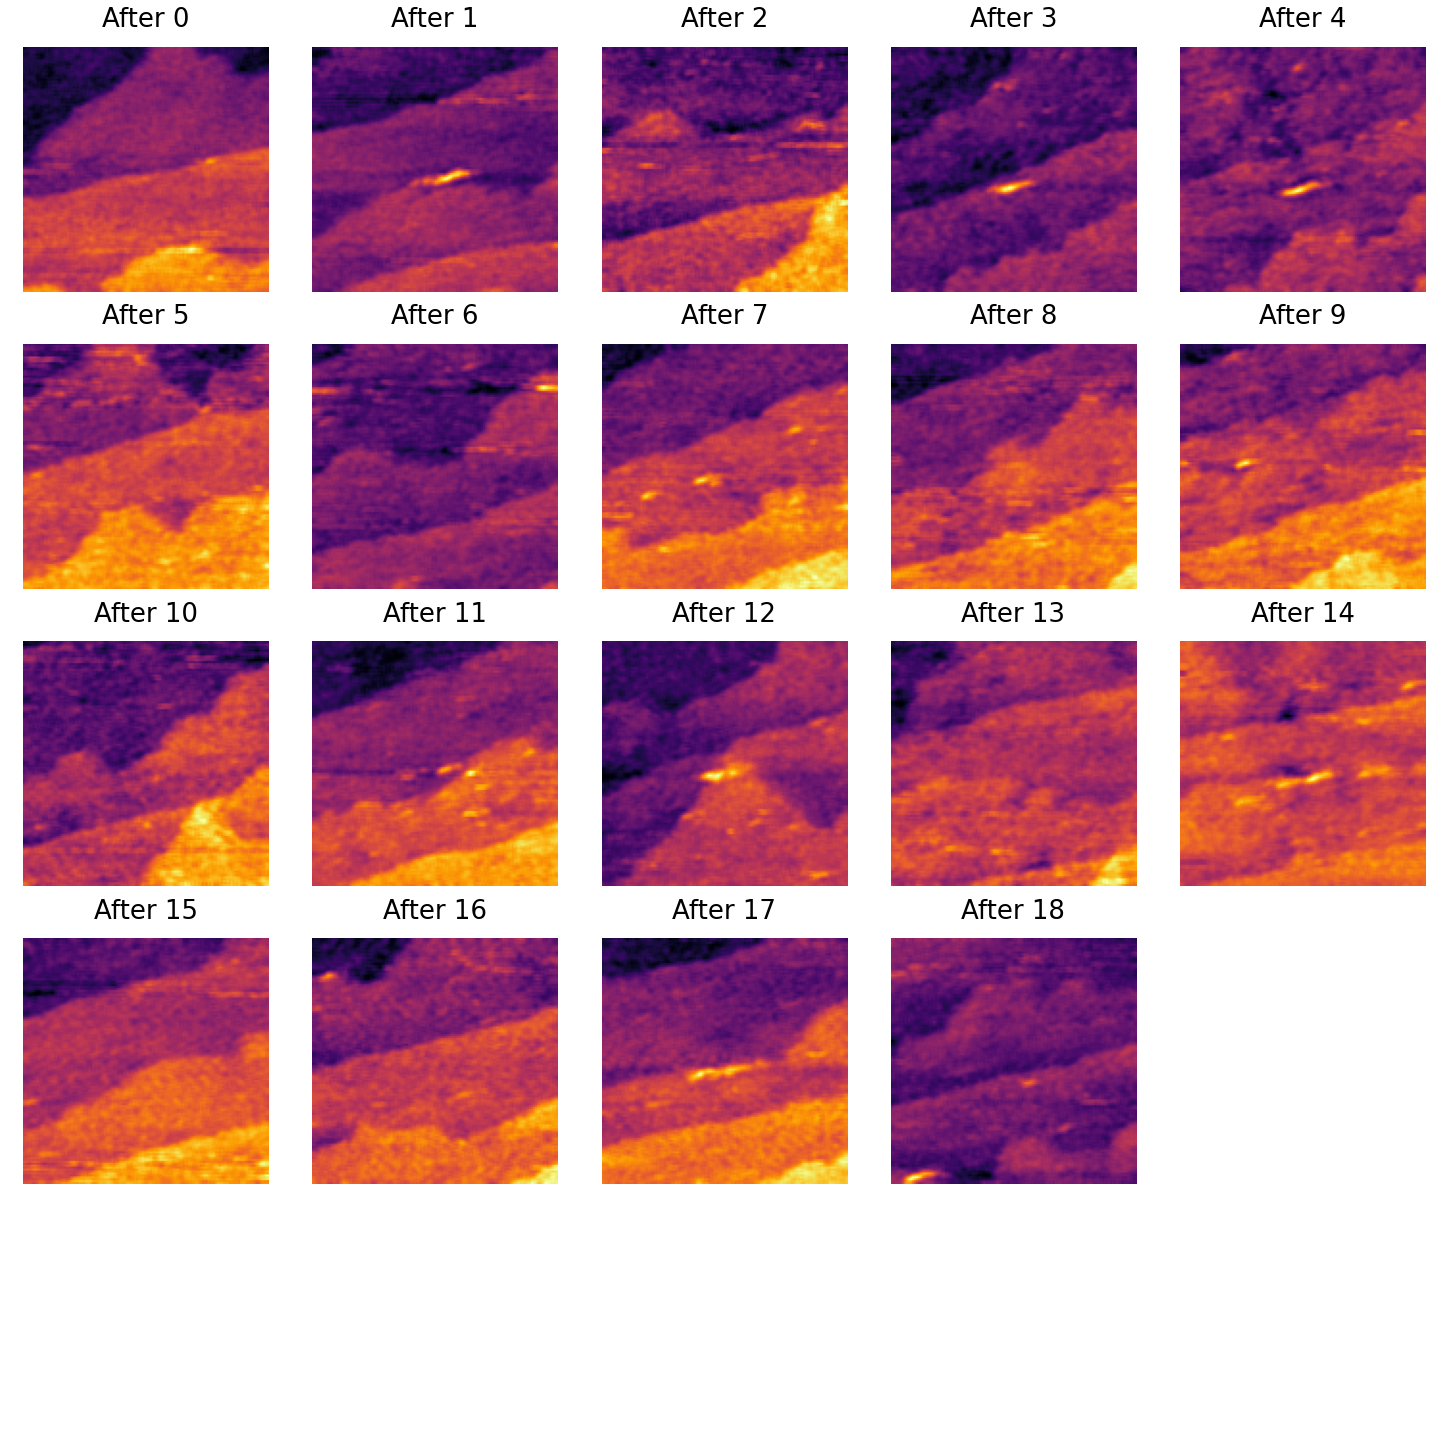

In [75]:
befores = corrected_scans[::2]
afters = corrected_scans[1::2]
image_grid(befores, 'Before')
image_grid(afters, 'After')